<a href="https://colab.research.google.com/github/Fernanda101704/Redes_Neurais_2021/blob/main/Projeto_2_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Projeto 2: Disciplina de Redes Neurais - UFU
# Tema: Processamento de imagens ANN
# Professor: Ubirajara Coutinho Filho
# Aluna: Fernanda Silva Pimenta
# Data: 07/07/2021


In [ ]:
# Inicialmente é necessário definir as bibliotecas que serão utilizadas para a execução do código:
from matplotlib import pyplot as plt
# matplotlib.pyplot é a biblioteca usada para fazer gráficos no Phyton e permite fazer as configurações do gráfico, como cor, formato, etc
from sklearn.svm import SVC
# sklearn.svm é uma biblioteca de Support Vector Machine que permite ajuste e seleção de modelos
from sklearn import preprocessing
# preprocessing é uma função de pré-processamento para qualquer dataset, a biblioteca que armazena essa função é a sklearn
from sklearn.model_selection import train_test_split
# train_test_split é uma função da biblioteca sklearn.model_selection utilizada para fazer a separação dos dados em treino e teste
from sklearn.metrics import classification_report
# classification_report é uma função da biblioteca sklearn.metrics utilizada para gerar relatórios de classificação (matriz confusão)
import numpy as np
# numpy é a biblioteca numérica do Phyton e no código ela é denominada de np
import pandas as pd
# pandas é a biblioteca responsável pela manipulação de arquivos e no código ela é denominada de pd
import cv2
# significa computer vision - é a biblioteca que trabalha processando imagens em uma ANN
import random
# É uma biblioteca de funções que tem geradores de números pseudoaleatórios
import zipfile
# biblioteca que permite usar ferramentas para criar, ler, adicionar e listar um arquivo ZIP
from keras.models import Sequential
# Sequential é uma função da biblioteca keras.models que permite criar uma lista simples de camadas de entrada única e saída única 
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# A biblioteca keras.layers é voltada a linguagens de aprendizagem profundas (deep learning), nesse caso, ela está realizando


In [ ]:
print("Essa rede neural utiliza um banco de dados de flores do site Kaggle")
print ("O link para acessar as fotos é: https://www.kaggle.com/olgabelitskaya/flower-color-images")

Essa rede neural utiliza um banco de dados de flores do site Kaggle
O link para acessar as fotos é: https://www.kaggle.com/olgabelitskaya/flower-color-images


In [ ]:
!git clone https://github.com/Fernanda101704/Redes_Neurais_2021
%cd Redes_Neurais_2021
# Esse comando é usado para criar uma cópia de um repositório ou parte específica dentro de um repositório, nesse caso foi criado uma cópia da pasta Redes_Neurais_2021

Cloning into 'Redes_Neurais_2021'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 133 (delta 53), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (133/133), 33.08 MiB | 23.25 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021


In [ ]:
# A lista "Flores" abaixo apresenta 3 zips diferentes com as flores margaridas, orquídeas e cravos. 
Flores =['Margaridas.zip','Orquídeas.zip','Cravo.zip']

flor_name=[]
# lista para armazenar o nome das imagens (vazia)
x_cinza=[]
# lista usada para armazenar as imagens em escalas de cinza (vazia)
x_original = []
# lista usada para armazenar as imagens originais (vazia)
for FILE in Flores:
  file_name = zipfile.ZipFile(FILE, 'r')
# Comando utilizado para ler (read) o arquivo zip
  file_name.extractall()
# Comando utilizado para extrair os arquivos do zip
  with zipfile.ZipFile(FILE, "r") as f:
# O comando abaixo verifica se o nome name está na f.namelist e o armazena na flor_name
      for name in f.namelist():
# o comando append é utilizado para registrar os nomes
          flor_name.append(name)


In [ ]:
print(flor_name)
# Esse comando é utilizado para imprimir o nome de cada imagem

['Margarida (11).png', 'Margarida (22).png', 'Margarida (33).png', 'Margarida (34).png', 'Margarida (35).png', 'Margarida (36).png', 'Margarida (45).png', 'Margarida (46).png', 'Margarida (47).png', 'Margarida (56).png', 'Margarida (57).png', 'Margarida (58).png', 'Margarida (59).png', 'Margarida (60).png', 'Margarida (61).png', 'Margarida (62).png', 'Margarida (63).png', 'Margarida (64).png', 'Margarida (65).png', 'Margarida (66).png', 'Margarida (67).png', 'Margarida (68).png', 'Margarida (69).png', 'Margarida (70).png', 'Margarida (71).png', 'Margarida (72).png', 'Margarida (73).png', 'Margarida (74).png', 'Margarida (75).png', 'Margarida (76).png', 'Margarida (77).png', 'Margarida (78).png', 'Margarida (79).png', 'Margarida (80).png', 'Margarida (81).png', 'Margarida (82).png', 'Margarida (83).png', 'Margarida (84).png', 'Margarida (85).png', 'Margarida (86).png', 'Margarida (87).png', 'Margarida (88).png', 'Margarida (99).png', 'Orquidea (1).png', 'Orquidea (2).png', 'Orquidea (3)

In [ ]:
y_names = []
# Criou-se uma lista em branco denominada y_names para armazenar somente as 3 primeiras letras do nome das imagens
for yy in flor_name:
  name = yy[0]+yy[1]+yy[2] 
# salva a primeira, segunda e terceira letra 
  y_names.append(name) 
# O comando append é utilizado para registrar as letras selecionadas pelo comando acima

In [ ]:
unique_list = []    
# Criou-se uma lista em branco denominada unique_list para armagenar as informações dos ZIPs que foram lidos
for yy in y_names:
# A associação dos comandos for e if permite extrair as informações desejadas 
  if yy not in unique_list:
# O comando append é utilizado para fazer o registro 
    unique_list.append(yy)


In [ ]:
print(unique_list)
# Esse comando é utilizado para imprimir as 3 primeiras letras da imagens obtidas pelos ZIPs
# Mar = Margaridas; Orq = Orquídeas; cra= Cravos.

['Mar', 'Orq', 'cra']


In [ ]:
n = len(unique_list)
# O comando len é utilizado para retornar a quantidade de elementos da lista unique_list
y = []
# Criou-se uma lista em branco denominada y para armazenar as informações de i através do comando append
for yy in y_names:
  for i in range(n):
# O comando range utiliza conjuntos numéricos para documentar se o intervalo da sequência é aberto ou fechado
    if(yy == unique_list[i]):
# O comando if é utilizado para apresentar uma condição para a execução do comando
      y.append(i)
# O comando append, como já mencionado, é utilizado para registrar as infomações de i em y 

In [ ]:
DATASET_SIZE = len(y_names)
# O comando len retorna a quantidade de elementos de y_names e armazena essa informação na lista DATASET_SIZE
Ind = range(DATASET_SIZE)
# O comando range utiliza conjuntos numéricos para documentar se o intervalo da sequência é aberto ou fechado
Flor_Size = 80
# Comando utilizado para definir o tamanho das imagens das flores
num_range = DATASET_SIZE
# Na lista num_range foram armazenadas as informações reportadas 

In [ ]:
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)
# Nessa linha do código definiu-se a porcentagem de dados que serão usados como teste (20%)
# Também foi definido o shuffle como ativo, ou seja, se pega uma sequência de dados como entrada e a embaralha
# random_state possibilita a reprodução de forma aleatória

In [ ]:
X_train = []
# Foi criada uma lista vazia denominada X_train
Y_train = []
# Foi criada uma lista vazia denominada Y_train
for II in Ind_train:
# Armazena-se em name as informações contidas em flor_name[II]
  name = flor_name[II]
# O comando abaixo através do append armazena as informações do resize que muda a resolução das imagens
  X_train.append(cv2.resize(cv2.imread(name),(Flor_Size,Flor_Size)))
# O comando Y_train armazena as informações de y[II]
  Y_train.append(y[II])

In [ ]:
X_test= []
# Assim como foi feito para os dados do treino, também foi criado uma lista vazia para armazenar os dados do teste após mudar a resolução
Y_test = []
# Foi criada uma lista vazia denominada Y_test para armazenar os valores indicados pelo comando append(y[II])
i =0
# Inicia-se atribuindo o valor de i igual a zero
for II in Ind_test:
# É atribuído a name o valor proveniente de flor_name[II]
  name = flor_name[II]
# O comando abaixo através do append armazena as informações do resize que muda a resolução das imagens
  X_test.append(cv2.resize(cv2.imread(name),(Flor_Size,g_Size)))
# O comando append armazena as informação de y[II] em Y_test
  Y_test.append(y[II])

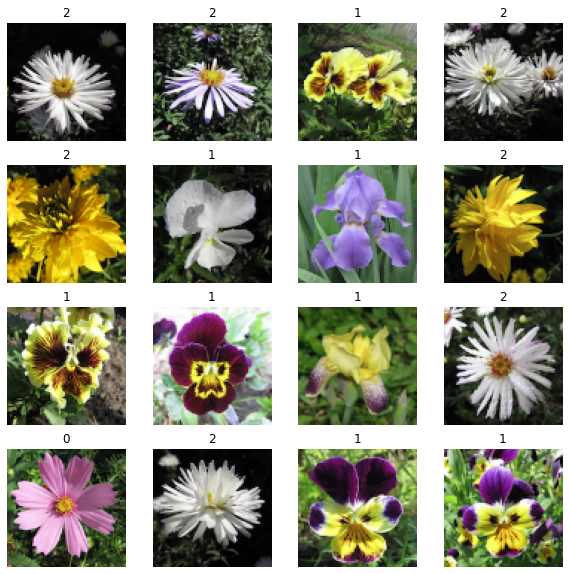

In [ ]:
num = len(Y_train)
# O comando len retorna a quantidade de elementos de Y_train e armazena essa informação em 'num'
plt.figure(figsize=(10, 10))
# O comando plt.figure indica a plotagem das imagens com o tamanho 10 x 10
for i in range(16):
# sendo i os elementos da lista 4x4=16 (range), ou seja, são plotadas 16 imagens (10 x 10)
  ax = plt.subplot(4, 4, i + 1)
# Definiu-se que serão plotadas 4 linhas e 4 colunas e o plot selecionada será o i+1 a fim de, garantir que sejam apresentadas imagens diferentes
  kk = int(random.randrange(num))
# O comando randrange retorna a incrementos específicos de números aleatórios
  RGB_img = cv2.cvtColor(X_train[kk], cv2.COLOR_BGR2RGB)
# Criou-se uma forma de converter os arquivos BGR (blue green red) em RGB (red green blue) para que as fotos fiquem visualmente mais bonitas
  plt.imshow(RGB_img)
# O comando acima faz a plotagem das imagens em RGB em duas dimensões
  plt.title(Y_train[kk])
# O comando plt.title indica que são plotados os títulos das imagens
  plt.axis("off")
# O comando plt.axis (off) indica que não há nenhum eixo x ou legenda nas fotos

In [ ]:
num
# Comando utilizado para indicar a quantidade de arquivos existentes

106

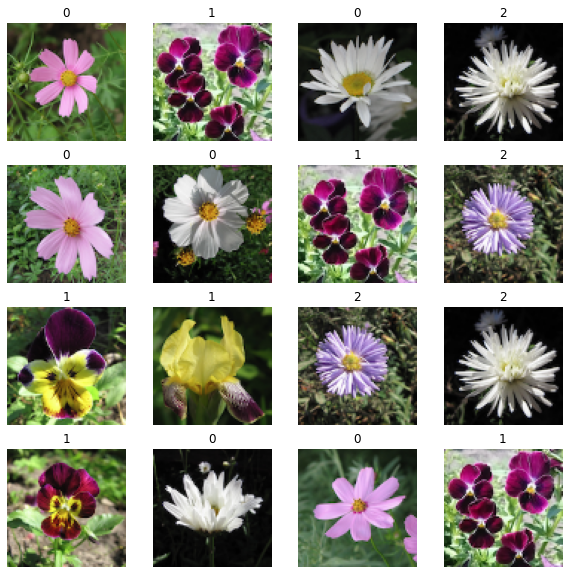

In [ ]:
num = len(Y_test)
# O comando len retorna a quantidade de elementos de Y_test e armazena essa informação em 'num'
plt.figure(figsize=(10, 10))
# O comando plt.figure indica a plotagem das imagens com o tamanho 10 x 10
for i in range(16):
# Sendo i os elementos da lista 4x4=16 (range), ou seja, são plotadas 16 imagens (10 x 10)
  ax = plt.subplot(4, 4, i + 1)
# Definiu-se que serão plotadas 4 linhas e 4 colunas e o plot selecionada será o i+1 a fim de, garantir que sejam apresentadas imagens diferentes
  kk = int(random.randrange(num))
# O comando randrange retorna a incrementos específicos de números aleatórios
  RGB_img = cv2.cvtColor(X_test[kk], cv2.COLOR_BGR2RGB)
# Criou-se uma forma de converter os arquivos BGR (blue green red) em RGB (red green blue) para que as fotos fiquem visualmente mais bonitas
  plt.imshow(RGB_img)
# O comando acima faz a plotagem das imagens em RGB em duas dimensões
  plt.title(Y_test[kk])
# O comando plt.title indica que são plotados os títulos das imagens
  plt.axis("off")
# O comando plt.axis (off) indica que não há nenhum eixo x ou legenda nas fotos

In [ ]:
X_new = []
# X_new é uma lista em branco 
for XX in X_train:
# Em X_new são armazenados os dados de XX presentes em X_train
  X_new.append(XX)
# O comando print (XX) indica a impressão dos dados de XX
print(XX)
# O comando copy retorna uma cópia superficial da lista X_new e atribui essa cópia a X_train
X_train = X_new.copy()


X_new = []
# X_new é uma lista em branco
for XX in X_test:
# Em X_new são armazenados os dados de XX presentes em X_test
  X_new.append(XX)
# O comando copy retorna uma cópia superficial da lista X_new e atribui essa cópia a X_test
X_test = X_new.copy()

[[[ 18  28  22]
  [ 11  13  12]
  [ 10  12  12]
  ...
  [ 12  16  14]
  [ 11  14  12]
  [ 18  29  25]]

 [[ 10  11  10]
  [ 10  12  12]
  [ 10  10  10]
  ...
  [ 11  14  12]
  [ 15  20  18]
  [ 18  39  32]]

 [[ 10  11  11]
  [ 10  12  12]
  [ 11  12  12]
  ...
  [ 11  14  12]
  [ 16  27  23]
  [ 16  40  34]]

 ...

 [[ 11  77 115]
  [  7 116 150]
  [ 18 155 190]
  ...
  [ 52  90  77]
  [ 81 110  99]
  [ 77 108  95]]

 [[ 15  26  38]
  [ 28  52  71]
  [ 36  72  95]
  ...
  [ 26  50  44]
  [ 15  47  33]
  [ 27  56  41]]

 [[ 25  33  43]
  [ 43  61  78]
  [ 49  72  89]
  ...
  [ 22  55  43]
  [ 27  72  56]
  [ 24  73  52]]]


In [ ]:
def ynindicator(Y):
# Foi definido o ynindicator que será usado nas próximas linhas do código
  N = len(Y)
# N armazena o tamanho de Y
  K = len(set(Y))
# K armazena o número de itens do set(Y), visto que 'set' é o nome dado a uma uma coleção de itens desordenada, porém não repetidos
  I = np.zeros((N, K))
# Retorna uma nova matriz com a forma e o tipo fornecidos, preenchida com zeros
  I[np.arange(N), Y] = 1
# O comando np.arange retorna valores uniformemente espaçados dentro de um determinado intervalo
  return I

In [ ]:
X_train = np.array(X_train)
# Nessa fase ocorre a manipulação dos dados para utilização através do comando np.array
Y_train = np.array(Y_train)
# Nessa fase ocorre a manipulação dos dados para utilização através do comando np.array
K = len(set(Y_train))
# K armazena o número de itens do set(Y_train)
X_train = X_train /255.0
# A divisão por 255 é para evitar a saturação, por isso é necessário a escalonação, já que as cores são preenchimentos de 0 a 255
Y_train = Y_train.astype(np.int32)
# O astype é usado para alterar o tipo de dados de uma coluna garantindo que os dados fiquem escalonados
Y_train = ynindicator(Y_train)

X_test = np.array(X_test)
# Nessa fase ocorre a manipulação dos dados para utilização através do comando np.array
Y_test = np.array(Y_test)
# Nessa fase ocorre a manipulação dos dados para utilização através do comando np.array
X_test = X_test /255.0
# A divisão por 255 é para evitar a saturação, por isso é necessário a escalonação, já que as cores são preenchimentos de 0 a 255
Y_test = Y_test.astype(np.int32)
# O astype é usado para alterar o tipo de dados de uma coluna garantindo que os dados fiquem escalonados
Y_test = ynindicator(Y_test)

In [ ]:
# Criou-se um modelo sequencial simples de camadas onde cada camada tem exatamente um tensor de entrada e um tensor de saída
model = Sequential()
# Foi construída uma CNN (Convolutional neural network)
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(3, 3)))
# Foram definidaas as particularidades do modelo, sendo as imagens coloridas, com 32 filtros, e com o kernel_size definido
model.add(BatchNormalization())
# A normalização em lote aplica uma transformação que mantém a saída média próxima a 0 e o desvio padrão da saída próximo a 1
model.add(Activation('tanh'))
# A função de ativação utilizada foi a tangente hiperbólica fazendo a comunicação entre os neurônios das camadas
model.add(MaxPooling2D())
# Ocorre a redução do tamanho da foto por conta do pooling (operação para dados espaciais)


model.add(Conv2D(filters=64, kernel_size=(3, 3)))
# Quando é aplicado um filtro ele auxilia a não perder informações, logo é comum colocar números crescentes 
model.add(BatchNormalization())
# A normalização em lote aplica uma transformação que mantém a saída média próxima a 0 e o desvio padrão da saída próximo a 1
model.add(Activation('tanh'))
# A função de ativação utilizada foi a tangente hiperbólica fazendo a comunicação entre os neurônios das camadas
model.add(MaxPooling2D())
# Ocorre a redução do tamanho da foto por conta do pooling (operação para dados espaciais)


model.add(Conv2D(filters=128, kernel_size=(3, 3)))
# O filtro auxilia a não perder informações, logo nessa camada aumentou-se os filtros para 128
model.add(BatchNormalization())
# A normalização em lote aplica uma transformação que mantém a saída média próxima a 0 e o desvio padrão da saída próximo a 1
model.add(Activation('tanh'))
# A função de ativação utilizada foi a tangente hiperbólica fazendo a comunicação entre os neurônios das camadas
model.add(MaxPooling2D())
# Ocorre a redução do tamanho da foto por conta do pooling (operação para dados espaciais)


model.add(Flatten())
# O Flatten possibilita obter uma cópia de um determinado array reduzido a uma dimensão
model.add(Dense(units=200))
# Dense é um tipo de camada do Keras que tem como objetivo calcular uma função de ativação em conjunto com os dados de entrada e pesos
model.add(Activation('tanh'))
# A função de ativação utilizada foi a tangente hiperbólica fazendo a comunicação entre os neurônios das camadas
model.add(Dropout(0.3))
# O dropout é utilizado para prevenir sobre-ajustamento dos dados
model.add(Dense(units=100))
# Dense é um tipo de camada do Keras que tem como objetivo calcular uma função de ativação em conjunto com os dados de entrada e pesos
# Nesse caso, foi reduzido o número de unidades para 100
model.add(Activation('tanh'))
# A função de ativação utilizada foi a tangente hiperbólica fazendo a comunicação entre os neurônios das camadas
model.add(Dense(units=K))
# Softmax é uma forma multidimensional generalizada da função logística e atua como função de ativação
model.add(Activation('softmax'))

# O camando compile indica a compilação dos dados, considerando as perdas, um otimizador (adam) e como métrica a acurácia que está diretamente relacionada à matriz confusão
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Definiu-se o modelo utilizando computando o tamanho do batch como 32 (fixo) e usando 20 épocas, o que influi diretamento nos resultados do teste
r = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=20, batch_size=32)
# O comando print possibilita acompanhar a evolução dos tópicos definidos anteriormente
print("Returned:", r)

Epoch 1/20
4/4 [==============================] - 45s 294ms/step - loss: 1.5890 - accuracy: 0.4462 - val_loss: 1.3871 - val_accuracy: 0.4444
Epoch 2/20
4/4 [==============================] - 0s 20ms/step - loss: 0.8304 - accuracy: 0.6579 - val_loss: 1.1050 - val_accuracy: 0.4444
Epoch 3/20
4/4 [==============================] - 0s 20ms/step - loss: 0.7195 - accuracy: 0.6764 - val_loss: 1.5165 - val_accuracy: 0.4074
Epoch 4/20
4/4 [==============================] - 0s 17ms/step - loss: 0.6135 - accuracy: 0.7195 - val_loss: 1.8442 - val_accuracy: 0.4074
Epoch 5/20
4/4 [==============================] - 0s 20ms/step - loss: 0.5973 - accuracy: 0.7335 - val_loss: 1.2436 - val_accuracy: 0.4074
Epoch 6/20
4/4 [==============================] - 0s 18ms/step - loss: 0.4598 - accuracy: 0.8456 - val_loss: 1.0434 - val_accuracy: 0.4074
Epoch 7/20
4/4 [==============================] - 0s 17ms/step - loss: 0.5296 - accuracy: 0.7666 - val_loss: 0.9521 - val_accuracy: 0.5556
Epoch 8/20
4/4 [=========

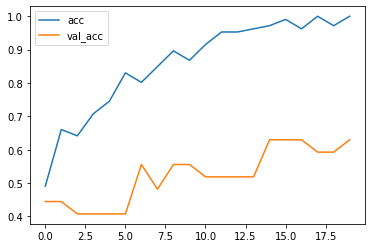

In [ ]:
# Plotagem dos gráficos
plt.plot(r.history['accuracy'], label='acurácia')
# Uma label é responsável por nomear os itens retratados no gráfico
# A acurária representa o número total de acertos em relação ao total
# E o Loss representa as perdas
plt.plot(r.history['val_accuracy'], label='val_acc')
# É plotado o gráfico apresentando legenda
plt.legend()
plt.show()
# O gráfico faz a representação da convergência e da aprendizagem do processo
# Conclui-se que não obteve-se resultados tão convergentes como esperado, visto que os dois dados encontram-se com muitas oscilações

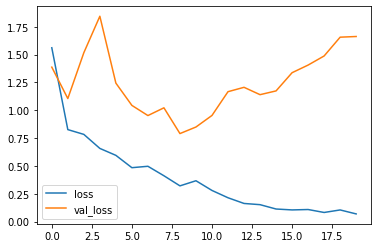

In [ ]:
# Plotagem dos gráficos
plt.plot(r.history['loss'], label='loss')
# Uma label é responsável por nomear os itens retratados no gráfico
# A acurária representa o número total de acertos em relação ao total
# E o Loss representa as perdas
plt.plot(r.history['val_loss'], label='val_loss')
# É plotado o gráfico apresentando legenda
plt.legend()
plt.show()
# O gráfico faz a representação da convergência e da aprendizagem do processo
# Conclui-se que não obteve-se resultados tão convergentes como esperado
# Os dados apresentam muitas oscilações, tendo uma interseção deles bem próximo ao ponto zero